<a href="https://colab.research.google.com/github/osamasyed270/NLP-Analysis-of-Amazon-Fine-Food-Reviews/blob/main/NLP_Analysis_of_Amazon_Fine_Food_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset Introduction**
In this notebook, we are using the Amazon Fine Food Reviews dataset from Kaggle. This dataset contains over 500,000 customer reviews on various food products sold on Amazon. Each review includes text, a star rating, and additional metadata, making it suitable for various NLP tasks such as sentiment analysis, text classification, and named entity recognition (NER).

We’ll apply different NLP techniques to analyze and preprocess the text data, ultimately extracting insights and building models based on the reviews.

## **Step 1: Importing Necessary Libraries**
Import essential libraries for data processing, NLP, and machine learning tasks.

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import re

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## **Step 2: Load the Dataset**
Load the Amazon Fine Food Reviews dataset and display the first few rows to inspect the data structure.

In [10]:
data = pd.read_csv('Reviews.csv')

data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## **Step 3: Part 1 (Text Preprocessing)**
Define a function to clean the text by removing non-alphabet characters, converting to lowercase, removing stop words, and lemmatizing. Apply this function to create a new column with processed text.



In [20]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text).lower()
    tokens = [word for word in text.split() if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

data['processed_text'] = data['Text'].apply(preprocess_text)

data[['Text', 'processed_text']].head()

,Text,processed_text
0,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanut pe...
2,This is a confection that has been around a fe...,confection around century light pillowy citrus...
3,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...


## **Step 4: Part 2 (Word Embedding using Word2Vec)**
Tokenize the processed text and train a Word2Vec model to create word embeddings, capturing the meaning and relationships between words. Retrieve the vector for an example word.

In [22]:
from gensim.models import Word2Vec

tokenized_text = data['processed_text'].apply(lambda x: x.split())

w2v_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=5, workers=4)

w2v_model.wv['good']

array([-3.00942399e-02,  6.36579990e-01,  8.91004562e-01,  3.37861598e-01,
       -1.80682761e-03,  4.67058092e-01,  4.71298248e-01, -2.19205856e+00,
        7.26846635e-01,  2.30973840e-01,  1.72633624e+00,  1.01479435e+00,
        4.68304187e-01, -4.83631045e-01,  1.24384239e-01,  3.17701840e+00,
        2.32882047e+00,  8.51416528e-01, -1.66507348e-01,  3.24207520e+00,
       -1.51890531e-01, -9.01277512e-02, -7.93820143e-01, -1.05767465e+00,
       -5.84783256e-01,  8.49730372e-01,  1.04307175e+00,  1.03398466e+00,
        2.67293006e-01, -5.27651668e-01,  8.39040637e-01, -1.63344586e+00,
        3.06087434e-01,  4.96871233e-01, -5.68881452e-01, -9.57798839e-01,
        3.14426363e-01,  1.11666811e+00,  1.54214954e+00,  2.02719307e+00,
       -5.07455945e-01,  1.66550171e+00,  1.07602191e+00, -1.50268719e-01,
       -1.93078279e+00, -3.63762319e-01, -5.17648220e-01,  8.71673465e-01,
       -2.68489170e+00, -2.27882624e+00, -1.71266282e+00, -8.45180213e-01,
       -8.47823679e-01, -

## **Step 5: Part 3 (Bag of Words (BoW) Encoding)**
Convert the processed text into a Bag of Words representation with a limited vocabulary size, capturing word frequency in each review.



In [23]:
count_vectorizer = CountVectorizer(max_features=1000)
bow = count_vectorizer.fit_transform(data['processed_text']).toarray()

bow.shape

(568454, 1000)

## **Step 6: Part 4 (Parts of Speech (POS) Tagging)**
Perform POS tagging on a sample review, labeling each word by its grammatical type (e.g., noun, verb).

In [25]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# POS tagging on a small sample of processed reviews
sample_text = data['processed_text'].iloc[0]
tokens = nltk.word_tokenize(sample_text)
pos_tags = nltk.pos_tag(tokens)

pos_tags

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('bought', 'VBD'),
 ('several', 'JJ'),
 ('vitality', 'NN'),
 ('canned', 'VBD'),
 ('dog', 'JJ'),
 ('food', 'NN'),
 ('product', 'NN'),
 ('found', 'VBD'),
 ('good', 'JJ'),
 ('quality', 'NN'),
 ('product', 'NN'),
 ('look', 'NN'),
 ('like', 'IN'),
 ('stew', 'NNS'),
 ('processed', 'VBN'),
 ('meat', 'NN'),
 ('smell', 'NN'),
 ('better', 'RBR'),
 ('labrador', 'NN'),
 ('finicky', 'JJ'),
 ('appreciates', 'VBZ'),
 ('product', 'NN'),
 ('better', 'RBR')]

## **Step 7: Part 1 (Sentiment Analysis using TextBlob)**
Calculate a sentiment polarity score for each review using TextBlob, indicating how positive or negative the text is.



In [26]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

data['sentiment'] = data['Text'].apply(get_sentiment)

data[['Text', 'sentiment']].head()

,Text,sentiment
0,I have bought several of the Vitality canned d...,0.450000
1,Product arrived labeled as Jumbo Salted Peanut...,-0.033333
2,This is a confection that has been around a fe...,0.133571
3,If you are looking for the secret ingredient i...,0.166667
4,Great taffy at a great price. There was a wid...,0.483333


**Convert the sentiment scores into categorical labels: Positive, Neutral, or Negative, based on defined score ranges.**

In [33]:
def get_sentiment_label(score):
  if score >= 0.3:
    return 'Positive'
  elif score >= 0.15 and score < 0.3:
    return 'Neutral'
  else:
    return 'Negative'

data['sentiment_label'] = data['sentiment'].apply(get_sentiment_label)

data[['sentiment', 'sentiment_label']].head()

,sentiment,sentiment_label
0,0.450000,Positive
1,-0.033333,Negative
2,0.133571,Negative
3,0.166667,Neutral
4,0.483333,Positive


**Visualize the distribution of sentiment labels across reviews with a pie chart.**

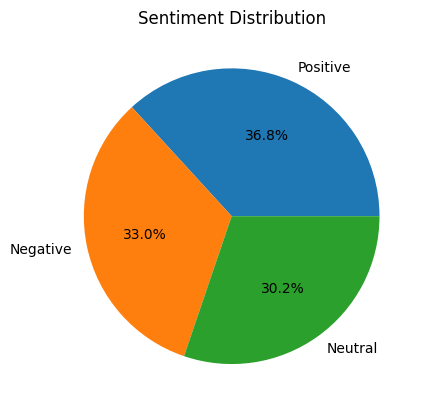

In [36]:
import matplotlib.pyplot as plt

sentiment_counts = data['sentiment_label'].value_counts()

plt.pie(sentiment_counts, labels = sentiment_counts.index, autopct = '%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

## **Step 8: Part 2 (Named Entity Recognition (NER))**
Use spaCy to extract named entities, such as names and dates, from a subset of reviews and display the identified entities for each review.

In [37]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 45.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [39]:
import spacy

nlp = spacy.load("en_core_web_sm")

def perform_ner(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

sample_data = data.head(10)

sample_data['entities'] = sample_data['Text'].apply(perform_ner)

sample_data[['Text', 'entities']].head()

<ipython-input-39-c5fbcca869ba>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['entities'] = sample_data['Text'].apply(perform_ner)


,Text,entities
0,I have bought several of the Vitality canned d...,"[(Vitality, ORG), (Labrador, PERSON)]"
1,Product arrived labeled as Jumbo Salted Peanut...,"[(Jumbo, PERSON), (Jumbo, PERSON)]"
2,This is a confection that has been around a fe...,"[(citrus gelatin, PERSON), (Filberts, PERSON),..."
3,If you are looking for the secret ingredient i...,"[(Robitussin, GPE), (the Root Beer Extract, ORG)]"
4,Great taffy at a great price. There was a wid...,[]
